**Praktek TF-IDF**

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
dataset = pd.read_csv('clean_dataset_stem.csv',sep=';')

In [3]:
dataset.shape

(11688, 10)

In [4]:
dataset.head(10)

,Unnamed: 0.1,Unnamed: 0,score,content,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,0,0,1.0,Kode billing tidak ada,kode billing tidak ada,"['kode', 'billing', 'tidak', 'ada']","['kode', 'billing', 'tidak', 'ada']",kode billing tidak ada,kode billing tidak ada,kode billing ada
1,1,1,1.0,"App nya saya mohon di perbaiki,saya udh log-in...",app nya saya mohon di perbaiki saya udh log in...,"['app', 'nya', 'saya', 'mohon', 'di', 'perbaik...","['app', 'nya', 'saya', 'mohon', 'di', 'perbaik...",app nya saya mohon di perbaiki saya udh log in...,app nya saya mohon di perbaiki saya udh log in...,app mohon baik saya udh log in bsoknya malah k...
2,2,2,1.0,"Maksudnya apa ini qplikasi, kirain bisa memban...",maksudnya apa ini qplikasi kirain bisa membant...,"['maksudnya', 'apa', 'ini', 'qplikasi', 'kirai...","['maksudnya', 'apa', 'ini', 'qplikasi', 'kirai...",maksudnya apa ini qplikasi kirain bisa membant...,maksudnya apa ini qplikasi kirain bisa membant...,maksud apa qplikasi kirain bantu buat paspor s...
3,3,3,1.0,"Bikin aplikasi, bukan memudahkan tetapi bikin ...",bikin aplikasi bukan memudahkan tetapi bikin t...,"['bikin', 'aplikasi', 'bukan', 'memudahkan', '...","['bikin', 'aplikasi', 'bukan', 'memudahkan', '...",bikin aplikasi bukan memudahkan tetapi bikin t...,bikin aplikasi bukan memudahkan tetapi bikin t...,bikin aplikasi bukan mudah bikin tambah masalah
4,4,4,1.0,aplikasi makan sagu Rakyat miskin,aplikasi makan sagu rakyat miskin,"['aplikasi', 'makan', 'sagu', 'rakyat', 'miskin']","['aplikasi', 'makan', 'sagu', 'rakyat', 'miskin']",aplikasi makan sagu rakyat miskin,aplikasi makan sagu rakyat miskin,aplikasi makan sagu rakyat miskin
5,5,5,1.0,"Paspor nggak bisa dinyatakan rusak apa tidak, ...",paspor nggak bisa dinyatakan rusak apa tidak p...,"['paspor', 'nggak', 'bisa', 'dinyatakan', 'rus...","['paspor', 'nggak', 'bisa', 'dinyatakan', 'rus...",paspor nggak bisa dinyatakan rusak apa tidak p...,paspor nggak bisa dinyatakan rusak apa tidak p...,paspor bisa nyata rusak apa padahal foto uploa...
6,6,6,1.0,Ini gimana si di pilih tanggal gak mau gabisa ...,ini gimana si di pilih tanggal gak mau gabisa ...,"['ini', 'gimana', 'si', 'di', 'pilih', 'tangga...","['ini', 'gimana', 'si', 'di', 'pilih', 'tangga...",ini gimana si di pilih tanggal gak mau gabisa ...,ini gimana si di pilih tanggal gak mau gabisa ...,gimana si pilih tanggal gak mau gabisa pilih l...
7,7,8,1.0,"Aplikasi milik negara kok gini amat ya, susah ...",aplikasi milik negara kok gini amat ya susah b...,"['aplikasi', 'milik', 'negara', 'kok', 'gini',...","['aplikasi', 'milik', 'negara', 'kok', 'gini',...",aplikasi milik negara kok gini amat ya susah b...,aplikasi milik negara kok gini amat ya susah b...,aplikasi milik negara kok gin ya susah banget ...
8,8,9,1.0,Aplikasinya Tidak bisa dibuka,aplikasinya tidak bisa dibuka,"['aplikasinya', 'tidak', 'bisa', 'dibuka']","['aplikasinya', 'tidak', 'bisa', 'dibuka']",aplikasinya tidak bisa dibuka,aplikasinya tidak bisa dibuka,aplikasi bisa buka
9,9,10,3.0,"Aneh banget ya masa kuota penuh terus,jadi mau...",aneh banget ya masa kuota penuh terus jadi mau...,"['aneh', 'banget', 'ya', 'masa', 'kuota', 'pen...","['aneh', 'banget', 'ya', 'masa', 'kuota', 'pen...",aneh banget ya masa kuota penuh terus jadi mau...,aneh banget ya masa kuota penuh terus jadi mau...,aneh banget masa kuota penuh terus jadi mau ng...


In [5]:
dataset_feature=dataset['content'].astype(str)

In [6]:
dataset_feature

0                                   Kode billing tidak ada
1        App nya saya mohon di perbaiki,saya udh log-in...
2        Maksudnya apa ini qplikasi, kirain bisa memban...
3        Bikin aplikasi, bukan memudahkan tetapi bikin ...
4                        aplikasi makan sagu Rakyat miskin
                               ...                        
11683    Keren Banget.. gampang banget prosesnya.. good...
11684                 Tidak ditemukan Kanim di lokasi anda
11685    Lemot bgt pas milih lokasi pengambilan paspor ...
11686    Aplikasi ini sangat membantu bagi saya yang me...
11687    Masih trial ya... Di banyuwangi sudah ada kant...
Name: content, Length: 11688, dtype: object

In [7]:
dataset

,Unnamed: 0.1,Unnamed: 0,score,content,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,0,0,1.0,Kode billing tidak ada,kode billing tidak ada,"['kode', 'billing', 'tidak', 'ada']","['kode', 'billing', 'tidak', 'ada']",kode billing tidak ada,kode billing tidak ada,kode billing ada
1,1,1,1.0,"App nya saya mohon di perbaiki,saya udh log-in...",app nya saya mohon di perbaiki saya udh log in...,"['app', 'nya', 'saya', 'mohon', 'di', 'perbaik...","['app', 'nya', 'saya', 'mohon', 'di', 'perbaik...",app nya saya mohon di perbaiki saya udh log in...,app nya saya mohon di perbaiki saya udh log in...,app mohon baik saya udh log in bsoknya malah k...
2,2,2,1.0,"Maksudnya apa ini qplikasi, kirain bisa memban...",maksudnya apa ini qplikasi kirain bisa membant...,"['maksudnya', 'apa', 'ini', 'qplikasi', 'kirai...","['maksudnya', 'apa', 'ini', 'qplikasi', 'kirai...",maksudnya apa ini qplikasi kirain bisa membant...,maksudnya apa ini qplikasi kirain bisa membant...,maksud apa qplikasi kirain bantu buat paspor s...
3,3,3,1.0,"Bikin aplikasi, bukan memudahkan tetapi bikin ...",bikin aplikasi bukan memudahkan tetapi bikin t...,"['bikin', 'aplikasi', 'bukan', 'memudahkan', '...","['bikin', 'aplikasi', 'bukan', 'memudahkan', '...",bikin aplikasi bukan memudahkan tetapi bikin t...,bikin aplikasi bukan memudahkan tetapi bikin t...,bikin aplikasi bukan mudah bikin tambah masalah
4,4,4,1.0,aplikasi makan sagu Rakyat miskin,aplikasi makan sagu rakyat miskin,"['aplikasi', 'makan', 'sagu', 'rakyat', 'miskin']","['aplikasi', 'makan', 'sagu', 'rakyat', 'miskin']",aplikasi makan sagu rakyat miskin,aplikasi makan sagu rakyat miskin,aplikasi makan sagu rakyat miskin
...,...,...,...,...,...,...,...,...,...,...
11683,11683,12493,5.0,Keren Banget.. gampang banget prosesnya.. good...,keren banget gampang banget prosesnya good job,"['keren', 'banget', 'gampang', 'banget', 'pros...","['keren', 'banget', 'gampang', 'banget', 'pros...",keren banget gampang banget prosesnya good job,keren banget gampang banget prosesnya good job,keren banget gampang banget proses good job
11684,11684,12495,2.0,Tidak ditemukan Kanim di lokasi anda,tidak ditemukan kanim di lokasi anda,"['tidak', 'ditemukan', 'kanim', 'di', 'lokasi'...","['tidak', 'ditemukan', 'kanim', 'di', 'lokasi'...",tidak ditemukan kanim di lokasi anda,tidak ditemukan kanim di lokasi anda,temu kanim lokasi
11685,11685,12496,1.0,Lemot bgt pas milih lokasi pengambilan paspor ...,lemot bgt pas milih lokasi pengambilan paspor ...,"['lemot', 'bgt', 'pas', 'milih', 'lokasi', 'pe...","['lemot', 'bgt', 'pas', 'milih', 'lokasi', 'pe...",lemot bgt pas milih lokasi pengambilan paspor ...,lemot bgt pas milih lokasi pengambilan paspor ...,lot bgt pas milih lokasi ambil paspor kaga mun...
11686,11686,12497,5.0,Aplikasi ini sangat membantu bagi saya yang me...,aplikasi ini sangat membantu bagi saya yang me...,"['aplikasi', 'ini', 'sangat', 'membantu', 'bag...","['aplikasi', 'ini', 'sangat', 'membantu', 'bag...",aplikasi ini sangat membantu bagi saya yang me...,aplikasi ini sangat membantu bagi saya yang me...,aplikasi sangat bantu saya butuh paspor lebih ...


In [9]:
dataset_label = dataset['score']
dataset_label

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
11683    5.0
11684    2.0
11685    1.0
11686    5.0
11687    2.0
Name: score, Length: 11688, dtype: float64

In [10]:
# Encoding
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
encoded_labels = label_encoder.fit_transform(dataset_label)

# Print the encoded labels
print(encoded_labels)

[0 0 0 ... 0 4 1]


**Cek Distribusi Score**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\62895\AppData\Local\Temp\ipykernel_24044\421850249.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(encoded_labels_series, label=f'target, skew: {encoded_labels_series.skew():.2f}')


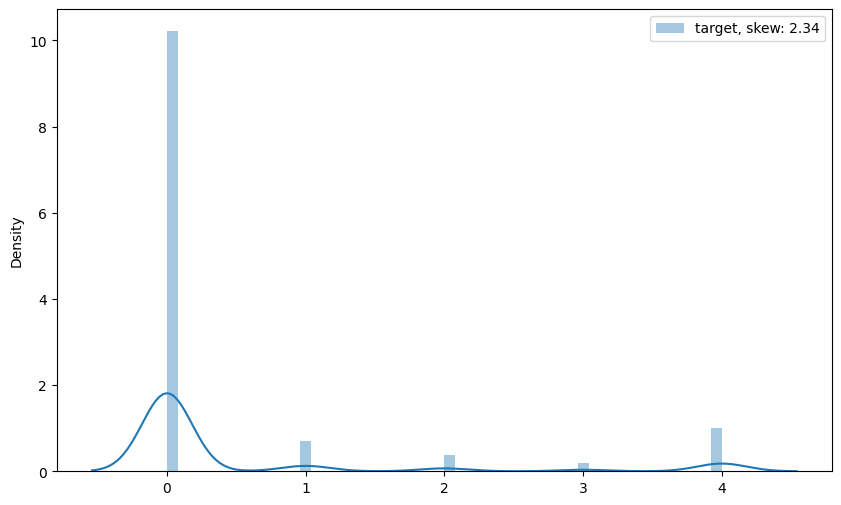

In [12]:
# Convert encoded_labels (NumPy array) back to pandas Series
encoded_labels_series = pd.Series(encoded_labels)

# Visualize the target variable
plt.figure(figsize=(10, 6))
sns.distplot(encoded_labels_series, label=f'target, skew: {encoded_labels_series.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [13]:
dataset_label.value_counts()

score
1.0    9550
5.0     941
2.0     658
3.0     355
4.0     184
Name: count, dtype: int64

**TF-IDF**

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
vectorizer = TfidfVectorizer()

In [16]:
X = vectorizer.fit_transform(dataset_feature)

In [17]:
print(X.shape)

(11688, 11566)


In [18]:
features = vectorizer.get_feature_names_out()

In [19]:
features

array(['00', '000', '000rb', ..., '𝚙𝚒𝚑𝚊𝚔', '𝚜𝚞𝚛𝚊𝚝', '𝚝𝚒𝚍𝚊𝚔'], dtype=object)

In [20]:
idfValues = vectorizer.idf_

In [21]:
d = dict(zip(features, 9 - idfValues))

In [22]:
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

In [23]:
for i in range(3867):
    print(sortedDict[i])

('aplikasi', 7.033131640340235)
('bisa', 6.625865135662975)
('di', 6.529777101007721)
('ini', 6.425119311542962)
('tidak', 6.316539662270522)
('nya', 6.15869723851803)
('mau', 6.08657882185769)
('dan', 6.0088522704019836)
('daftar', 5.942808858084993)
('gak', 5.871374684315672)
('aja', 5.870655518516967)
('terus', 5.807554812149023)
('ga', 5.783513328524338)
('yg', 5.783513328524338)
('ada', 5.7644953226885765)
('sudah', 5.681982901114113)
('sangat', 5.647511967202757)
('saya', 5.643005425100867)
('malah', 5.616459243861172)
('tapi', 5.6155311695486185)
('paspor', 5.609944562839979)
('error', 5.595839956658437)
('buat', 5.579610483491457)
('untuk', 5.567019518122945)
('tolong', 5.566044383964739)
('aplikasinya', 5.563113263155879)
('yang', 5.507794987845524)
('lagi', 5.469855769669296)
('bikin', 5.465550057958085)
('ke', 5.447041091903126)
('susah', 5.447041091903126)
('email', 5.347767022301701)
('padahal', 5.330630740058714)
('udah', 5.320705100258744)
('imigrasi', 5.309419714027078)

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [25]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

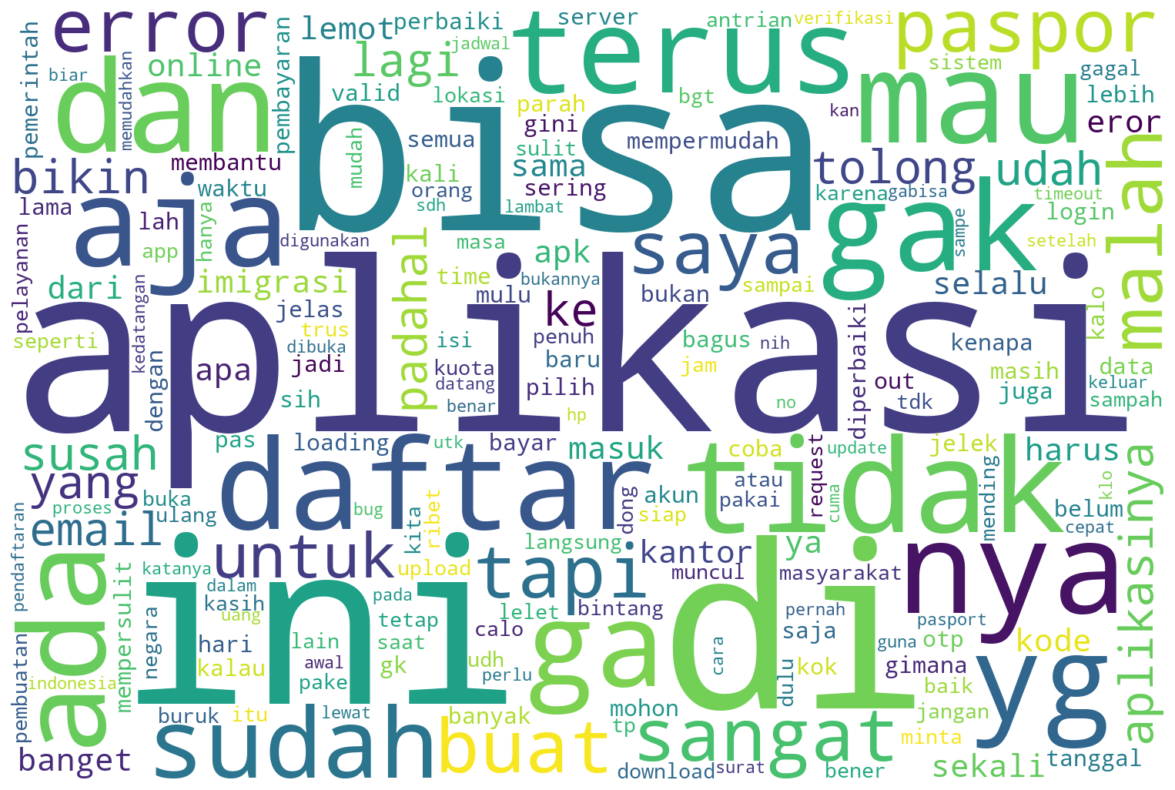

In [26]:
PlotWordCloud(d)